In [ ]:
%cd /content/drive/MyDrive/xray

/content/drive/MyDrive/xray


In [ ]:
%ls

data.py  __pycache__/          resultplotsfold2.jpg  resultplotsfold5.jpg  weights2.h5  weights5.h5
preds/   raw_data/             resultplotsfold3.jpg  unet.py               weights3.h5  weights.h5
preds1/  resultplotsfold1.jpg  resultplotsfold4.jpg  weights1.h5           weights4.h5  xray.jpg


In [ ]:
import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from skimage.segmentation import mark_boundaries
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose,Dropout,UpSampling2D,Concatenate,Reshape,Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from skimage.exposure import rescale_intensity
from keras.callbacks import History
from skimage import io
from tensorflow.keras.layers import ZeroPadding2D
from PIL import Image

from data import DataClass

from unet import UNet

Loading-Training On Custom Data


In [ ]:
images_path = "raw_data/all_images"
masks_path = "raw_data/labels"

data_pipeline = DataClass(target_shape=(256,256),images_path = images_path, masks_path = masks_path)


In [ ]:
images, masks = data_pipeline.load_data()

print(images.shape,masks.shape)

images= data_pipeline.preprocess(images)
masks= data_pipeline.preprocess(masks)

print(images.shape,masks.shape)


(500, 256, 256) (500, 256, 256)
(500, 256, 256, 1) (500, 256, 256, 1)


In [ ]:
unet = UNet(input_shape = (256,256))

------------------------------
Started pipeline with preprocessing train data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------


------------------------------
Fitting model...
------------------------------
Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 0.3347 - dice_coef: 0.6653

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 24s 193ms/step - loss: 0.3347 - dice_coef: 0.6653 - val_loss: 0.3429 - val_dice_coef: 0.6571
Epoch 2/50
40/40 [==============================] - 7s 166ms/step - loss: 0.2837 - dice_coef: 0.7163 - val_loss: 0.3300 - val_dice_coef: 0.6700
Epoch 3/50
40/40 [==============================] - 6s 147ms/step - loss: 0.2927 - dice_coef: 0.7073 - val_loss: 0.3312 - val_dice_coef: 0.6688
Epoch 4/50
40/40 [==============================] - 6s 155ms/step - loss: 0.2765 - dice_coef: 0.7235 - val_loss: 0.3371 - val_dice_coef: 0.6629
Epoch 5/50
40/40 [==============================] - 6s 154ms/step - loss: 0.2770 - dice_coef: 0.7230 - val_loss: 0.3389 - val_dice_coef: 0.6611
Epoch 6/50
40/40 [==============================] - 6s 155ms/step - loss: 0.2730 - dice_coef: 0.7270 - val_loss: 0.3354 - val_dice_coef: 0.6646
Epoch 7/50
40/40 [==============================] - 7s 186ms/step - loss: 0.2651 - dice_coef: 0.7349 - val_loss: 0.3240 - val_dice_coef: 0.6760
Ep

------------------------------
Fitting model...
------------------------------
Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 0.3776 - dice_coef: 0.6224

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 13s 178ms/step - loss: 0.3776 - dice_coef: 0.6224 - val_loss: 0.3435 - val_dice_coef: 0.6565
Epoch 2/50
40/40 [==============================] - 7s 169ms/step - loss: 0.2925 - dice_coef: 0.7075 - val_loss: 0.3384 - val_dice_coef: 0.6616
Epoch 3/50
40/40 [==============================] - 7s 166ms/step - loss: 0.2778 - dice_coef: 0.7222 - val_loss: 0.3368 - val_dice_coef: 0.6632
Epoch 4/50
40/40 [==============================] - 7s 169ms/step - loss: 0.2819 - dice_coef: 0.7181 - val_loss: 0.3331 - val_dice_coef: 0.6669
Epoch 5/50
40/40 [==============================] - 7s 169ms/step - loss: 0.2749 - dice_coef: 0.7251 - val_loss: 0.3251 - val_dice_coef: 0.6749
Epoch 6/50
40/40 [==============================] - 6s 163ms/step - loss: 0.2648 - dice_coef: 0.7352 - val_loss: 0.3098 - val_dice_coef: 0.6902
Epoch 7/50
40/40 [==============================] - 7s 169ms/step - loss: 0.2531 - dice_coef: 0.7469 - val_loss: 0.2833 - val_dice_coef: 0.7167
Ep

------------------------------
Fitting model...
------------------------------
Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 0.3722 - dice_coef: 0.6278

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 14s 205ms/step - loss: 0.3722 - dice_coef: 0.6278 - val_loss: 0.3603 - val_dice_coef: 0.6397
Epoch 2/50
40/40 [==============================] - 7s 165ms/step - loss: 0.2949 - dice_coef: 0.7051 - val_loss: 0.3582 - val_dice_coef: 0.6418
Epoch 3/50
40/40 [==============================] - 6s 156ms/step - loss: 0.2855 - dice_coef: 0.7145 - val_loss: 0.3624 - val_dice_coef: 0.6376
Epoch 4/50
40/40 [==============================] - 6s 163ms/step - loss: 0.2823 - dice_coef: 0.7177 - val_loss: 0.3692 - val_dice_coef: 0.6308
Epoch 5/50
40/40 [==============================] - 6s 157ms/step - loss: 0.2809 - dice_coef: 0.7191 - val_loss: 0.3634 - val_dice_coef: 0.6366
Epoch 6/50
40/40 [==============================] - 7s 163ms/step - loss: 0.2908 - dice_coef: 0.7092 - val_loss: 0.3613 - val_dice_coef: 0.6387
Epoch 7/50
40/40 [==============================] - 6s 155ms/step - loss: 0.2815 - dice_coef: 0.7185 - val_loss: 0.3591 - val_dice_coef: 0.6409
Ep

------------------------------
Fitting model...
------------------------------
Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 0.4044 - dice_coef: 0.5956

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 14s 178ms/step - loss: 0.4044 - dice_coef: 0.5956 - val_loss: 0.3576 - val_dice_coef: 0.6424
Epoch 2/50
40/40 [==============================] - 7s 168ms/step - loss: 0.2887 - dice_coef: 0.7113 - val_loss: 0.3519 - val_dice_coef: 0.6481
Epoch 3/50
40/40 [==============================] - 6s 161ms/step - loss: 0.2854 - dice_coef: 0.7146 - val_loss: 0.3473 - val_dice_coef: 0.6527
Epoch 4/50
40/40 [==============================] - 6s 158ms/step - loss: 0.2789 - dice_coef: 0.7211 - val_loss: 0.3526 - val_dice_coef: 0.6474
Epoch 5/50
40/40 [==============================] - 6s 157ms/step - loss: 0.2828 - dice_coef: 0.7172 - val_loss: 0.3521 - val_dice_coef: 0.6479
Epoch 6/50
40/40 [==============================] - 6s 158ms/step - loss: 0.2806 - dice_coef: 0.7194 - val_loss: 0.3476 - val_dice_coef: 0.6524
Epoch 7/50
40/40 [==============================] - 6s 158ms/step - loss: 0.2964 - dice_coef: 0.7036 - val_loss: 0.3487 - val_dice_coef: 0.6513
Ep

------------------------------
Fitting model...
------------------------------
Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 0.8132 - dice_coef: 0.1868

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 13s 181ms/step - loss: 0.8132 - dice_coef: 0.1868 - val_loss: 0.9992 - val_dice_coef: 8.2356e-04
Epoch 2/50
40/40 [==============================] - 6s 152ms/step - loss: 0.9993 - dice_coef: 6.7835e-04 - val_loss: 0.9992 - val_dice_coef: 8.2356e-04
Epoch 3/50
40/40 [==============================] - 6s 148ms/step - loss: 0.9993 - dice_coef: 6.8380e-04 - val_loss: 0.9992 - val_dice_coef: 8.2356e-04
Epoch 4/50
40/40 [==============================] - 6s 152ms/step - loss: 0.9993 - dice_coef: 6.7652e-04 - val_loss: 0.9992 - val_dice_coef: 8.2356e-04
Epoch 5/50
40/40 [==============================] - 6s 147ms/step - loss: 0.9993 - dice_coef: 6.7539e-04 - val_loss: 0.9992 - val_dice_coef: 8.2356e-04
Epoch 6/50
40/40 [==============================] - 6s 149ms/step - loss: 0.9993 - dice_coef: 6.7839e-04 - val_loss: 0.9992 - val_dice_coef: 8.2356e-04
Epoch 7/50
40/40 [==============================] - 6s 152ms/step - loss: 0.9993 - dice_coef: 6.8066e-

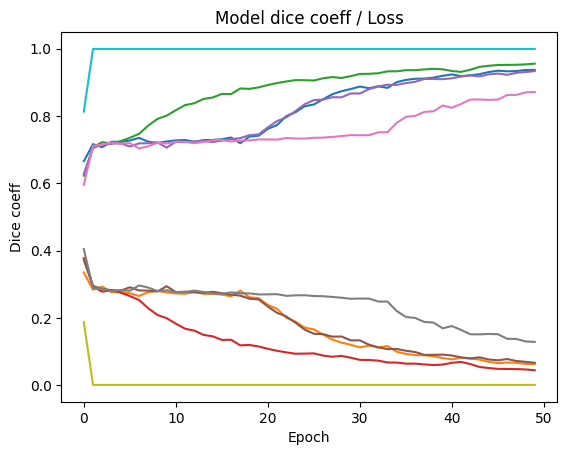

In [ ]:
haus, hist = unet.train_and_predict(images,masks,kfold=5)

1


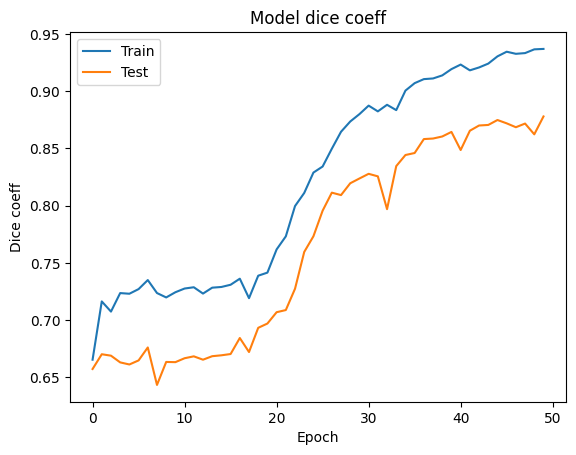

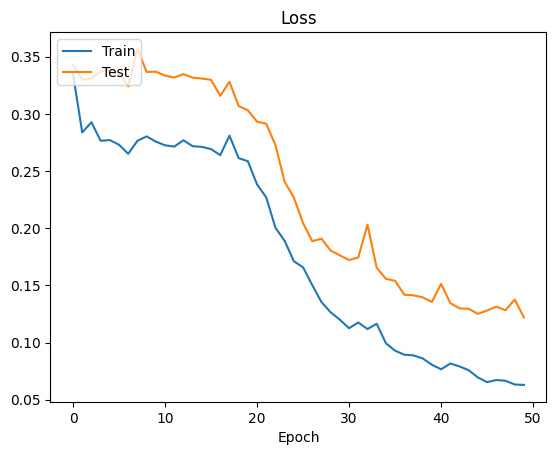

2


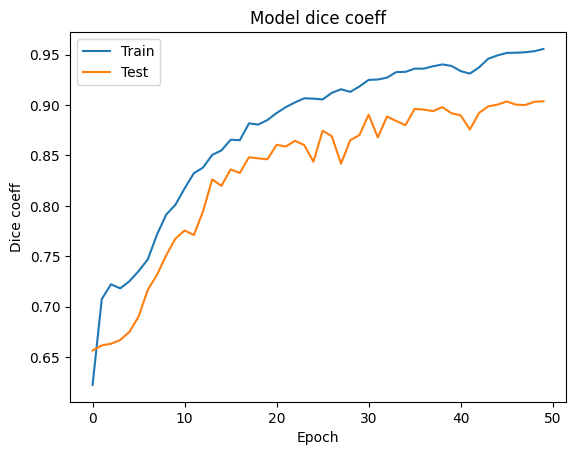

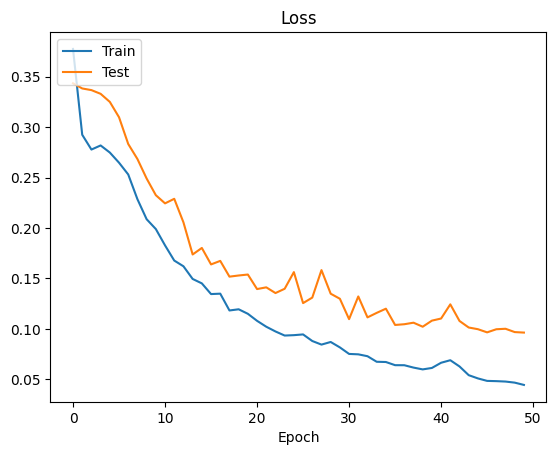

3


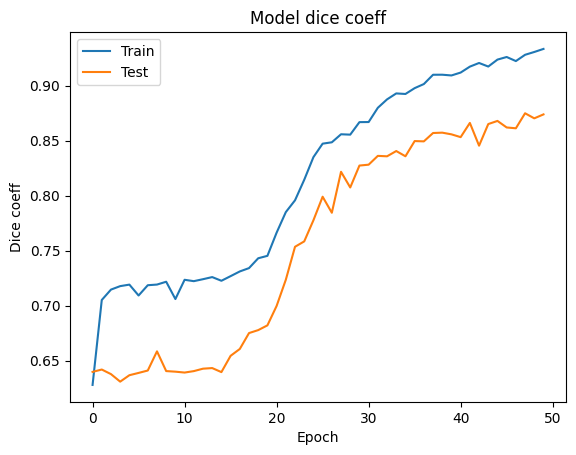

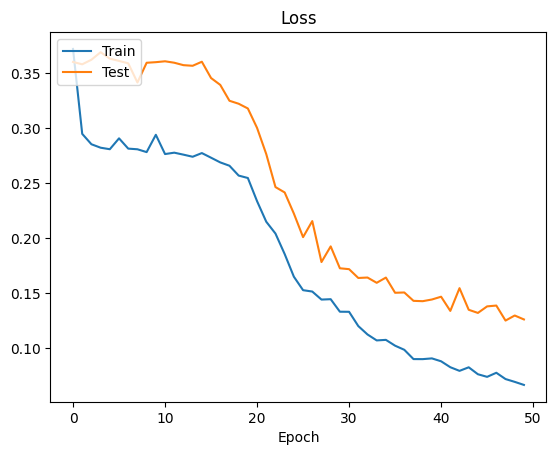

4


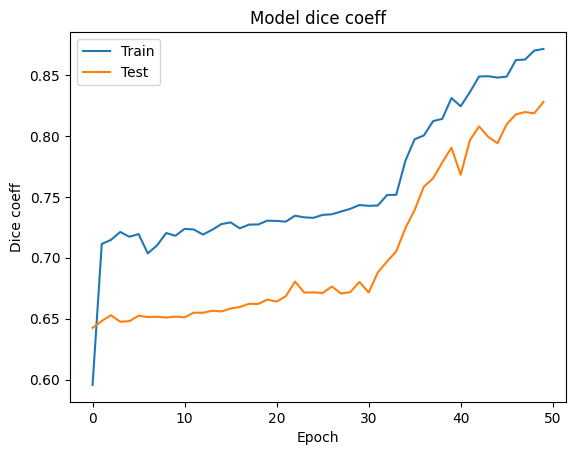

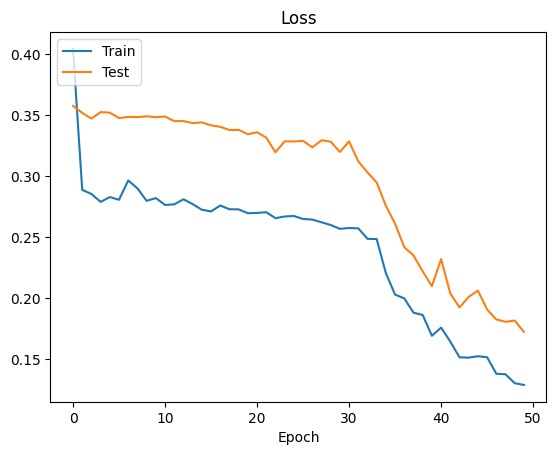

5


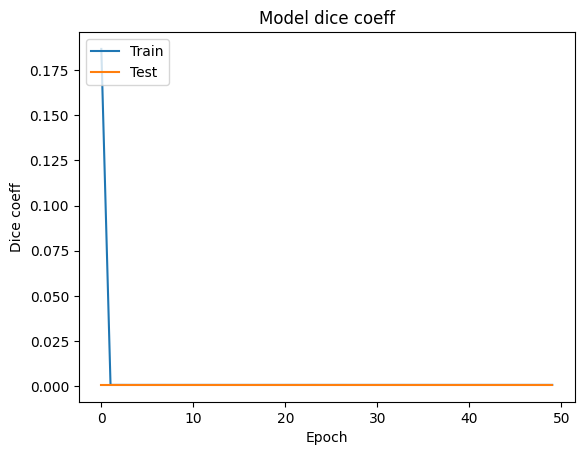

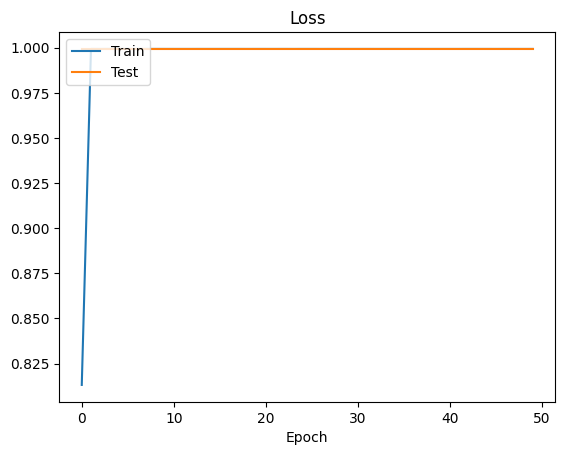

In [ ]:
from matplotlib import pyplot as plt
hist[0]
count=1
for his in hist:
    print(count)
    count+=1
    plt.plot(his['dice_coef'])
    plt.plot(his['val_dice_coef'])
    plt.title('Model dice coeff')
    plt.ylabel('Dice coeff')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(his['loss'])
    plt.plot(his['val_loss'])
    plt.title('Loss')

    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


In [ ]:
hist[0]
avg=[]
for his in hist[:-1]:
  avg.append((his["val_dice_coef"][-1]))
print("Average dice coeff at val set : {}".format(sum(avg)/len(avg)))

Average dice coeff at val set : 0.8708852976560593


In [ ]:
hist[4]["val_dice_coef"][-1]

0.0008235597051680088

Loading Model and Testing on A Single Image

In [ ]:

model = UNet.get_unet()

model.load_weights('weights5.h5') 


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 32)         320       ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 256, 256, 32)         9248      ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 32)         0         ['conv2d_20[0][0]']           
 g2D)                                                                                       

1/1 [==============================] - 1s 685ms/step


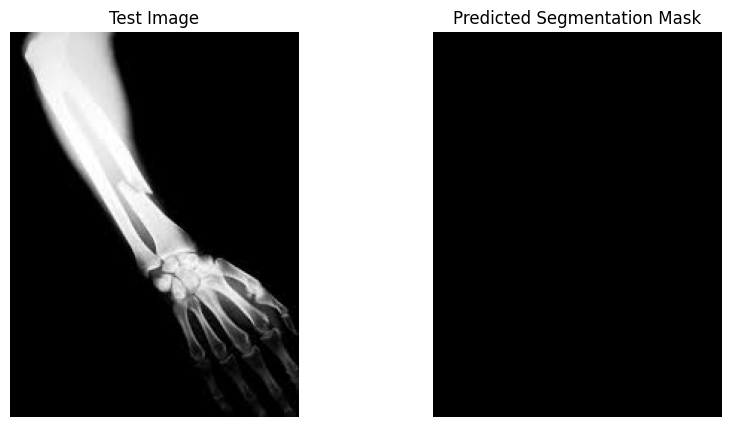

In [ ]:
import cv2
from matplotlib import pyplot as plt
test_image_path = 'Path/To/Image' 
test_image = cv2.imread(test_image_path,cv2.IMREAD_GRAYSCALE)
test_image_resized = cv2.resize(test_image, (256, 256))  # resize to match input size of model
#test_image_normalized = test_image_resized / 255.0  # normalize to [0, 1]
test_image_input = np.expand_dims(test_image_resized, axis=0)  # add batch dimension

# Predict the segmentation mask
predicted_mask = model.predict(test_image_input)[0]

# Post-process and visualize the mask
predicted_mask_thresholded = (predicted_mask > 0.5).astype(np.uint8)  # thresholding
predicted_mask_resized = cv2.resize(predicted_mask_thresholded, (test_image.shape[1], test_image.shape[0]))  # resize to original image size

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Test Image')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Predicted Segmentation Mask')
plt.imshow(predicted_mask_resized, cmap='gray')
plt.axis('off')


plt.show()